In [2]:
%matplotlib widget

import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

In [3]:
# # Load publicly available data from Mark Churchland's group
# path = "exampleData.mat"
# datas, times = load_churchland_data(path)

# print(len(times))
# print(datas[0].shape)

# # Create a jPCA object
# jpca = jPCA.JPCA(num_jpcs=6)

n = 1000
t = np.linspace(0, 10, n)

datas = []

x = np.sin(t) + np.random.normal(0.1, 0.01, n)
y = np.cos(t) + np.random.normal(0.1, 0.01, n)
z = t + np.random.normal(0.1, 0.01, n)
tmp = [
    np.hstack(
        (np.array([x, y, z]).T, 
        np.random.multivariate_normal(
            np.zeros(20),np.eye(20),t.shape[0]
        ))
)]
# tmp = tmp + [np.zeros_like(tmp[0])] 
# tmp_0 = np.zeros_like(tmp)
    
print(len(tmp))
print(tmp[0].shape)


1
(1000, 23)


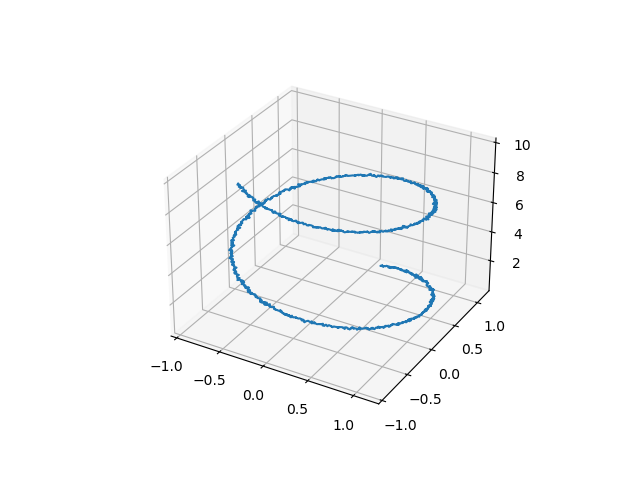

In [4]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(x, y, z)

In [5]:
n = 1000
t = np.linspace(0, 1000, n)
times = list(t)
extra_dims = 20
cycle = t * 2.5 * np.pi/ (t[-1]) 
datas = []

for _ in range(2):
    x = np.sin(cycle) + np.random.normal(0, 0.01, n)
    y = np.cos(cycle) + np.random.normal(0, 0.01, n)
    z = t + np.random.normal(0, 0.01, n)
    tmp = np.hstack(
        (np.array([x, y, z]).T, 
        np.random.multivariate_normal(
            np.zeros(extra_dims)*0.01,np.eye(extra_dims),t.shape[0]
        ))
    )
    # tmp = np.array([x, y, z]).T
    # tmp = np.hstack((
    #     np.array([x, y, z]).T, 
    #     np.zeros((t.shape[0],extra_dims))  
    # ))
    # tmp = np.repeat(np.array([x, y]).T,109,axis=-1)
    
    datas.append(tmp)

print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

len(datas) = 2
datas[0].shape = (1000, 23)


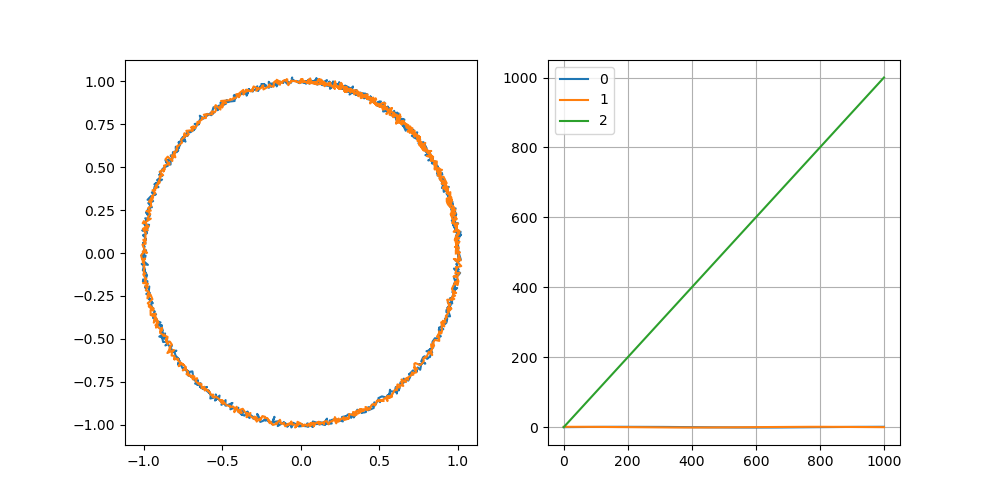

In [6]:
fig, axes = plt.subplots(1,2 , figsize=(10, 5))
axes[0].plot(datas[0][:, 0], datas[0][:, 1])
axes[0].plot(x, y)
for i in range(3):
    axes[1].plot(t, datas[0][:, i], label=f'{i}')
axes[1].grid()
axes[1].legend()
plt.show()


In [7]:
jpca = jPCA.JPCA(num_jpcs=2)
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(
    datas, times=times, tstart=t[0], tend=t[-1], num_pcs=23, subtract_cc_mean=False
)

In [8]:
print(f'jpca_var_capt = {jpca_var_capt}')
print(f'pca_var_capt = {pca_var_capt}')

print("\nInput:")
print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

print("\nOutput:")
# print(np.array_equal(projected[0], np.zeros_like(projected[0])))
print(f'len(projected) = {len(projected)}')
print(f'projected[0].shape = {projected[0].shape}')


jpca_var_capt = [0.00698957 0.00707406]
pca_var_capt = [0.08399244 0.01086784 0.00846191 0.00816485 0.00805787 0.00791403
 0.00771677 0.00765394 0.00740125 0.00739629 0.00719653 0.00708988
 0.00690737 0.00678013 0.00663006 0.00652151 0.00646718 0.00622142
 0.00619541 0.00606874 0.00592555 0.00574095 0.00518067]

Input:
len(datas) = 2
datas[0].shape = (1000, 23)

Output:
len(projected) = 2
projected[0].shape = (1000, 2)


In [9]:
print(t)

[   0.            1.001001      2.002002      3.003003      4.004004
    5.00500501    6.00600601    7.00700701    8.00800801    9.00900901
   10.01001001   11.01101101   12.01201201   13.01301301   14.01401401
   15.01501502   16.01601602   17.01701702   18.01801802   19.01901902
   20.02002002   21.02102102   22.02202202   23.02302302   24.02402402
   25.02502503   26.02602603   27.02702703   28.02802803   29.02902903
   30.03003003   31.03103103   32.03203203   33.03303303   34.03403403
   35.03503504   36.03603604   37.03703704   38.03803804   39.03903904
   40.04004004   41.04104104   42.04204204   43.04304304   44.04404404
   45.04504505   46.04604605   47.04704705   48.04804805   49.04904905
   50.05005005   51.05105105   52.05205205   53.05305305   54.05405405
   55.05505506   56.05605606   57.05705706   58.05805806   59.05905906
   60.06006006   61.06106106   62.06206206   63.06306306   64.06406406
   65.06506507   66.06606607   67.06706707   68.06806807   69.06906907
   70.07

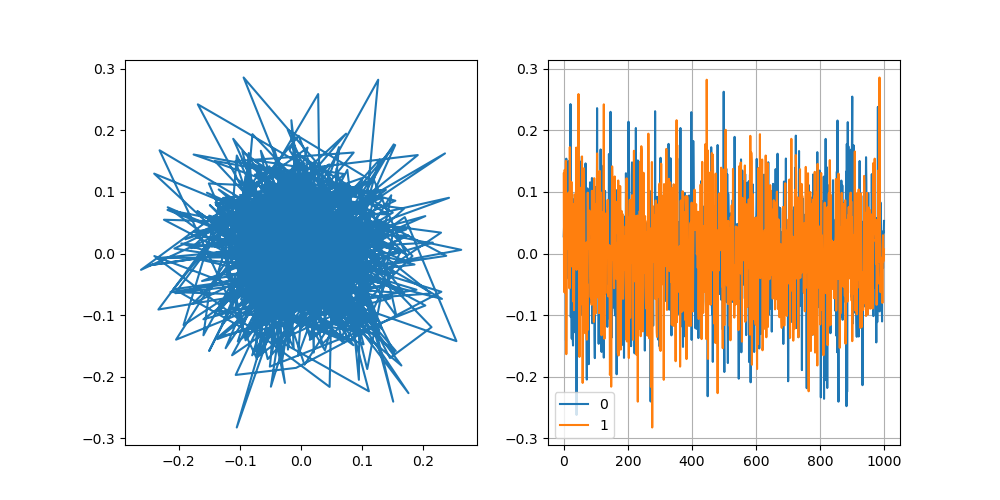

In [9]:
fig, axes = plt.subplots(1,2 , figsize=(10, 5))
axes[0].plot(projected[0][:, 0], projected[0][:, 1])
# axes[0].plot(x, y)
for i in range(2):
    axes[1].plot(projected[0][:, i], label=f'{i}')
axes[1].grid()
axes[1].legend()
plt.show()


len(times) = 61
len(datas) = 108
datas[0].shape = (61, 218)
2
(21, 4)


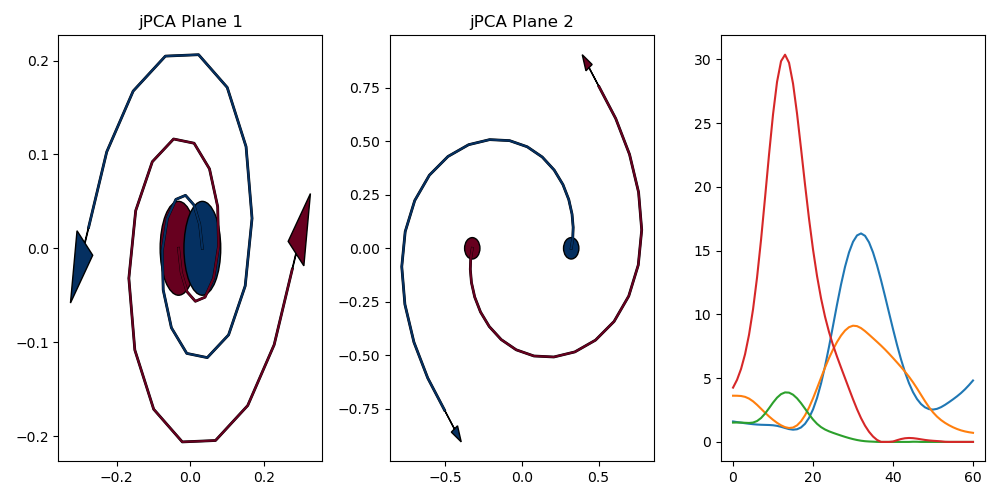

In [10]:
# Load publicly available data from Mark Churchland's group
path = "exampleData.mat"
datas, times = load_churchland_data(path)

print(f'len(times) = {len(times)}')
print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

# Create a jPCA object
jpca = jPCA.JPCA(num_jpcs=4)

# Fit the jPCA object to data
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(datas[:2], times=times, tstart=-50, tend=150)

print(len(projected))
print(projected[0].shape)
# Plot the projected data
# x_idx and y_idx control which columns of the data are shown.
# For example, to plot the second jPCA plane, use x_idx=2, y_idx=3
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plot_projections(projected, axis=axes[0], x_idx=0, y_idx=1)
plot_projections(projected, axis=axes[1], x_idx=2, y_idx=3)

axes[0].set_title("jPCA Plane 1")
axes[1].set_title("jPCA Plane 2")
for i in range(4):
    axes[2].plot(datas[0][:,i])
plt.tight_layout()
plt.show()

In [13]:
print(times)
print(list(np.linspace(-50, 550, len(times), dtype=int)))

[-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550]
[-50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0, 400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0, 500.0, 510.0, 520.0, 530.0, 540.0, 550.0]


In [3]:
# Here's how we would get the variance of first plane:
print("Variance captured by each jPC:")
jpca_var_capt / full_data_var

Variance captured by each jPC:


array([0.14174162, 0.14708453, 0.08170893, 0.07743372, 0.0919853 ,
       0.07063135])

In [4]:
# Example of getting the eigenvalues of M_skew
print("Eigenvalues of M_skew:")
np.round(np.linalg.eigvals(jpca.M_skew), 3)

Eigenvalues of M_skew:


array([ 0.+0.08j ,  0.-0.08j , -0.+0.048j, -0.-0.048j,  0.+0.008j,
        0.-0.008j])